# Analyse der aufbereiteten Daten von Daniel

## Übersicht:
* Einlesen von Packages und setzen von Variablen / Funktionen
* Daten einlesen und erste Übersicht erzeugen
* Verteilungsanalyse
* Zeitliche Analyse


## Einlesen von Packages und setzen von Variablen / Funktionen

In [6]:
from datetime import date

import pandas as pd
import numpy as np

import pandas_profiling as pd_profil

import functions as fu
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Pfade setzen
c_fold = fu.get_folder()
p_fold = c_fold + '\data\Prepared'
folder = c_fold + '\data\Processed\Zyklus'
folder_final = c_fold + '\data\Processed\\final'

## Daten einlesen und erste Übersicht erzeugen

In [8]:
df = pd.read_csv(f"{folder_final}\\df_fertige_features.csv", sep=',')

profile = pd_profil.ProfileReport(df)

datum = date.today().strftime("%Y_%m_%d")

profile.to_file(f"{c_fold}\\models\\zyklus_aggregiert_explorationreport_{datum}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Analyse der Feature Correlations

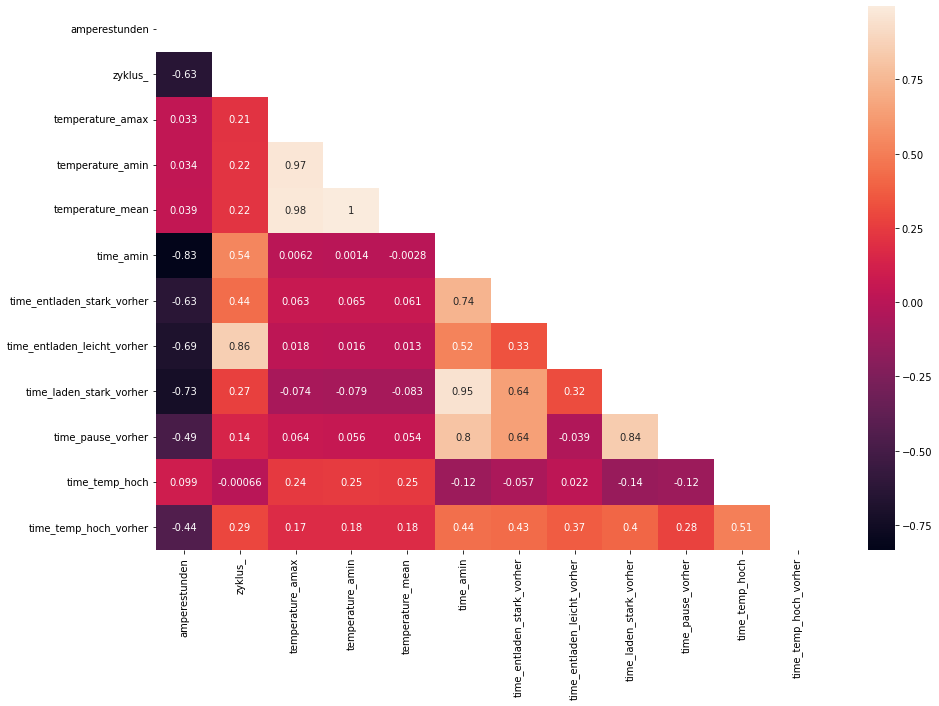

In [3]:
data = df

corrMatrix = data.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))


plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True,mask=mask)
plt.draw()